In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [ ]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
!pip install cython pyyaml==5.1

# install detectron2:
!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html

     |████████████████████████████████| 274 kB 5.2 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=8f8a2d1c3d3e6272627a2a2bccf7df5ba89079140fbb708d5644ff7add6472c9
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html
     |████████████████████████████████| 6.2 MB 925 kB/s 
     |████████████████████████████████| 49 kB 4.9 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5.post20211019-py3-none-any.whl size=60878 sha256=0ec788c09120df346f6dcb5fcaedacb81c94ea22cde1acf372c4d291306a686d
  Stored in directory: /root/.cache/pip/wheels/d5/d8/f6/3efc4adc326f143da627d450bf74a3c0bec35cb3df37b84f38
Successfully built fvcore


In [ ]:
!python -m detectron2.utils.collect_env

----------------------  ----------------------------------------------------------------
sys.platform            linux
Python                  3.7.12 (default, Sep 10 2021, 00:21:48) [GCC 7.5.0]
numpy                   1.19.5
detectron2              0.1.3 @/usr/local/lib/python3.7/dist-packages/detectron2
detectron2._C           failed to import
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.9.0+cu111 @/usr/local/lib/python3.7/dist-packages/torch
PyTorch debug build     False
CUDA available          True
GPU 0                   Tesla K80
CUDA_HOME               /usr/local/cuda
NVCC                    Build cuda_11.1.TC455_06.29190527_0
Pillow                  7.1.2
torchvision             0.10.0+cu111 @/usr/local/lib/python3.7/dist-packages/torchvision
torchvision arch flags  sm_35, sm_50, sm_60, sm_70, sm_75, sm_80, sm_86
fvcore                  0.1.5.post20211019
cv2                     4.1.2
----------------------  -------------------------------------------------------

In [ ]:
!pip show torch

Name: torch
Version: 1.9.0+cu111
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.7/dist-packages
Requires: typing-extensions
Required-by: torchvision, torchtext, fastai


In [ ]:
!python -m pip install detectron2 -f \https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html


In [ ]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
!pip install cython pyyaml==5.1

# install detectron2:
!python -m pip install detectron2 -f \
  https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.6/index.html


In [ ]:
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo

Cloning into 'detectron2_repo'...
remote: Enumerating objects: 13382, done.
remote: Counting objects: 100% (883/883), done.
remote: Compressing objects: 100% (453/453), done.
remote: Total 13382 (delta 549), reused 694 (delta 424), pack-reused 12499
Receiving objects: 100% (13382/13382), 5.72 MiB | 16.23 MiB/s, done.
Resolving deltas: 100% (9497/9497), done.
Obtaining file:///content/detectron2_repo
     |████████████████████████████████| 74 kB 2.2 MB/s 
     |████████████████████████████████| 145 kB 11.2 MB/s 
     |████████████████████████████████| 130 kB 45.4 MB/s 
     |████████████████████████████████| 743 kB 37.0 MB/s 
     |████████████████████████████████| 748 kB 37.7 MB/s 
     |████████████████████████████████| 112 kB 50.5 MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141230 sha256=a596e4c6a1cd4d944122efce5422fa40ce1d7db494e93351a5a283425021eaff
  Stored in directory: /root/.cache/pip/wheels/ca/33/b7/336836125fc9bb

In [ ]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

In [ ]:
!rm -r frames/*
!mkdir frames/
#specify path to video
from google.colab import drive
drive.mount('/content/gdrive')
video = '/content/gdrive/My Drive/Mini Project/video/final 1.mp4' # video

#capture video
cap = cv2.VideoCapture(video)
cnt=0

# Check if video file is opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")

ret,first_frame = cap.read()

#Read until video is completed
while(cap.isOpened()):
    
  # Capture frame-by-frame
  ret, frame = cap.read()
     
  if ret == True:

    #save each frame to folder        
    cv2.imwrite('frames/'+str(cnt)+'.png', frame)
    cnt=cnt+1
    if(cnt==750):
      break

  # Break the loop
  else: 
    break

rm: cannot remove 'frames/*': No such file or directory
Mounted at /content/gdrive


In [ ]:
#frame rate of a video
FPS=cap.get(cv2.CAP_PROP_FPS)
print(FPS)

30.0


In [ ]:
cfg = get_cfg()

# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_C4_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.9  # set threshold for this model

# Find a model from detectron2's model zoo.
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_C4_3x.yaml")
predictor = DefaultPredictor(cfg)

model_final_f97cb7.pkl: 136MB [00:04, 29.5MB/s]                           


In [ ]:
#read a random image from the frames folder
import random as r
random_number = r.randint(0,749)
print(random_number)
img = cv2.imread(f"frames/{random_number}.png")

#pass to the model
outputs = predictor(img)

222


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


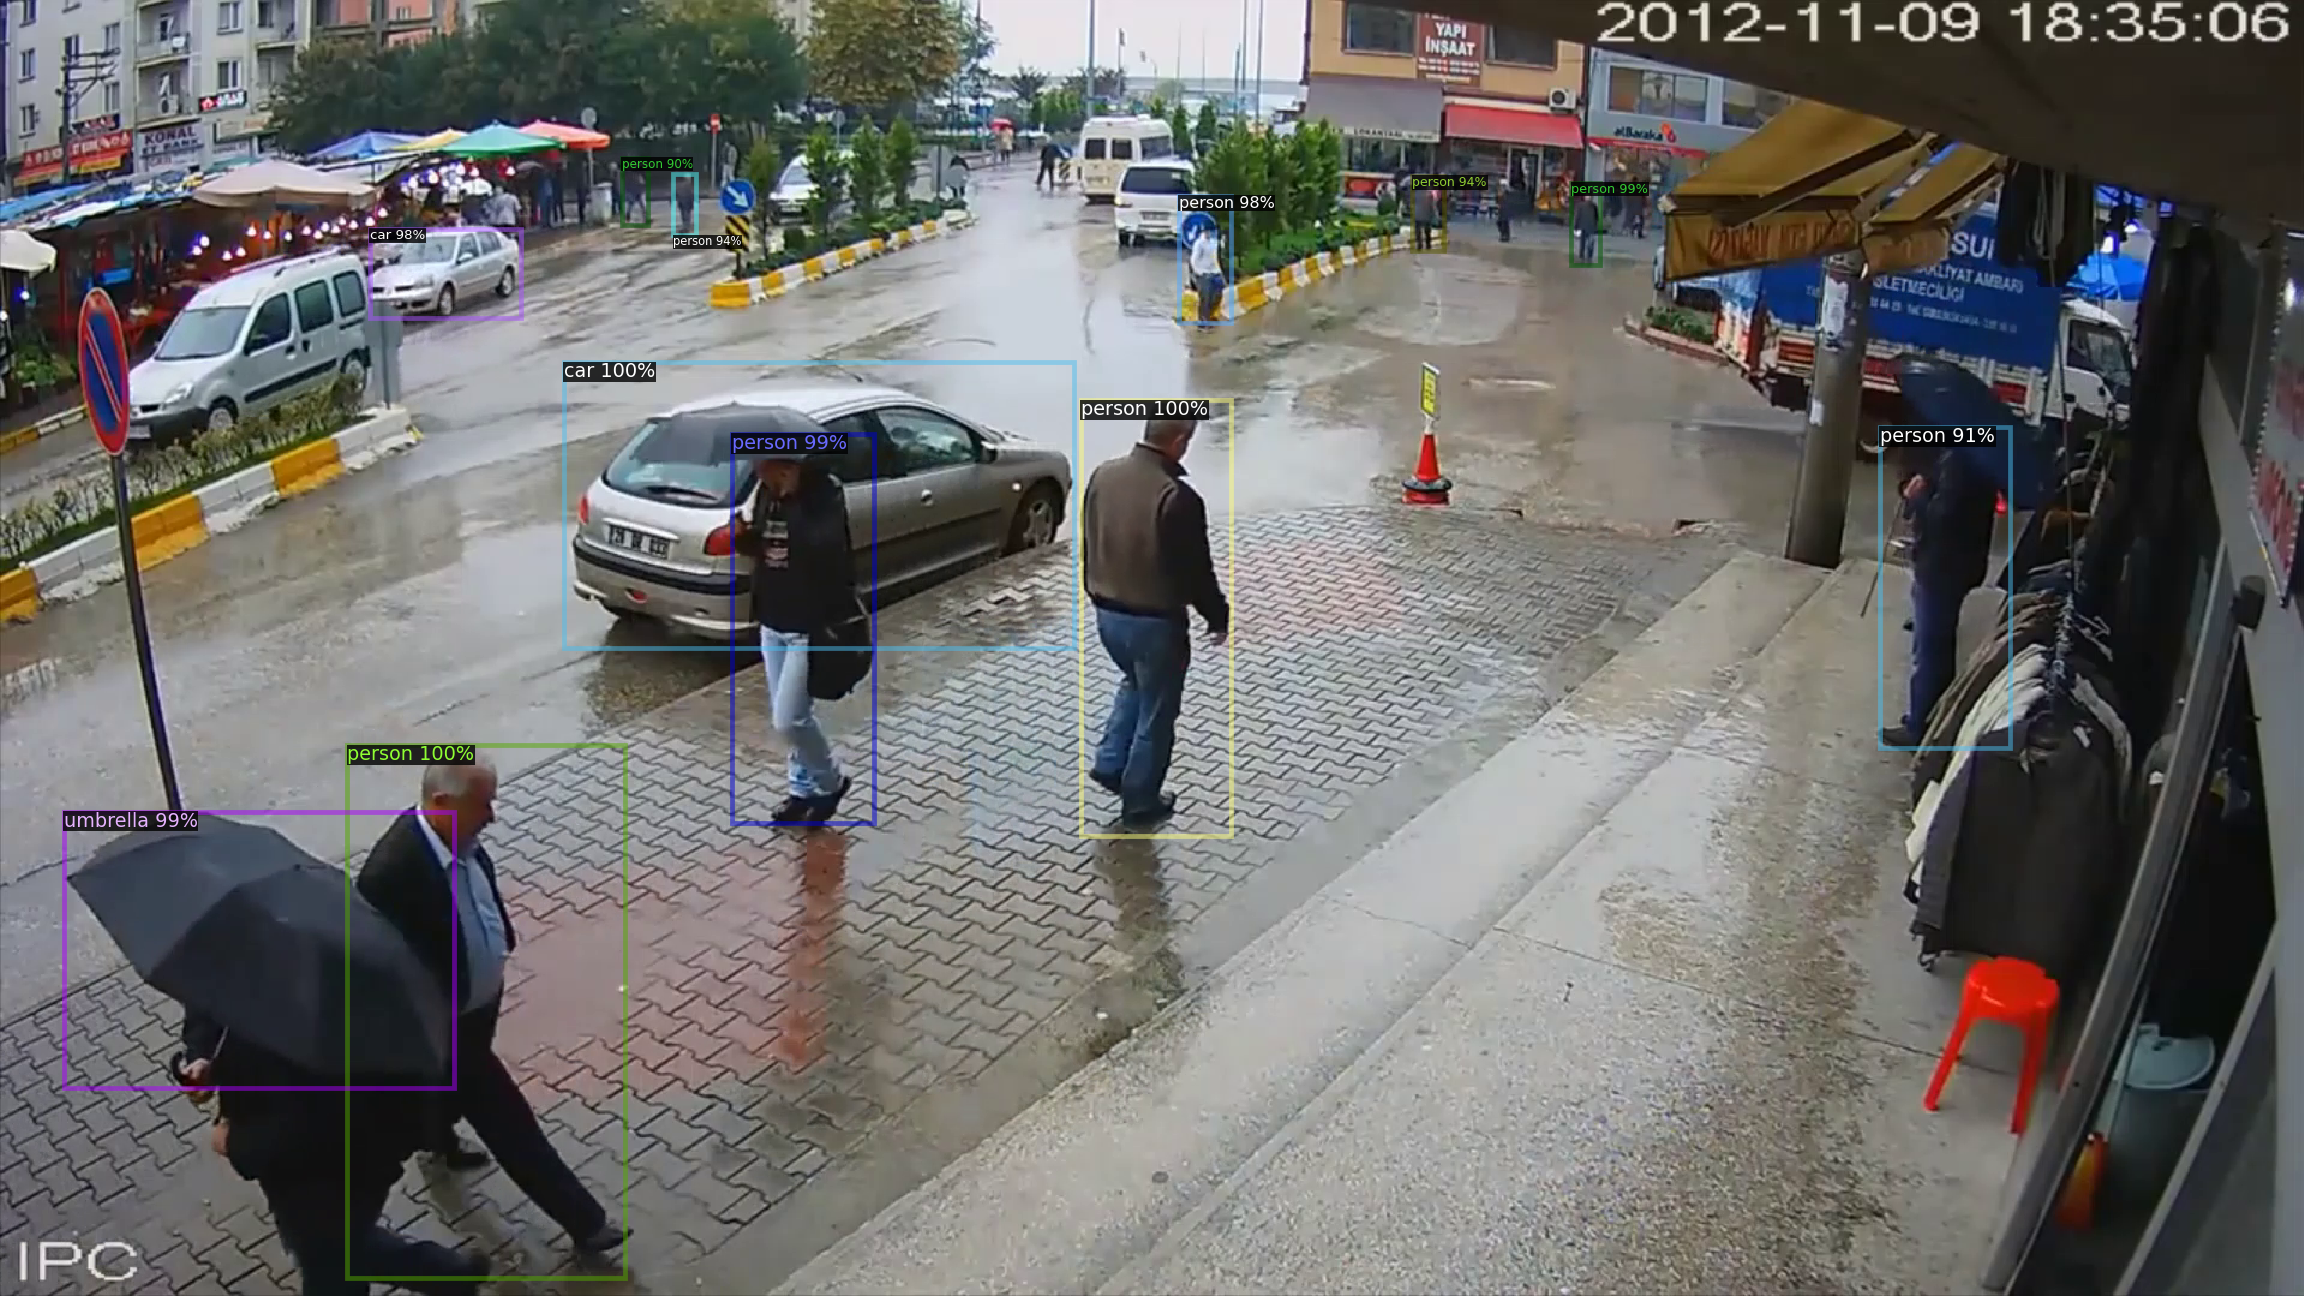

In [ ]:
# Use `Visualizer` to draw the predictions on the image.
v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

In [ ]:
# 0-person ;  2 - car ; 25 - umbrella
classes=outputs['instances'].pred_classes.cpu().numpy()
print(classes)

[ 0  0  2 25  0  0  2  0  0  0  0  0]


In [ ]:
bbox=outputs['instances'].pred_boxes.tensor.cpu().numpy()
print(bbox)

[[ 900.73895   333.66095  1025.9512    696.6336  ]
 [ 289.51776   621.0724    520.90784  1064.6885  ]
 [ 469.96643   301.9037    895.22253   539.8821  ]
 [  52.980583  676.3229    378.73465   907.01434 ]
 [ 610.0927    361.5816    728.6076    685.62195 ]
 [1309.285     152.27908  1333.3365    220.45198 ]
 [ 308.12567   190.74712   433.88474   264.73328 ]
 [ 982.1044    163.0778   1026.0194    269.4005  ]
 [ 561.00165   145.28621   580.2358    196.12077 ]
 [1177.0732    146.69623  1203.4281    209.55734 ]
 [1566.659     355.80676  1674.5844    623.3364  ]
 [ 517.94336   131.39258   539.9947    187.81876 ]]


In [ ]:
#identity only persons 
ind = np.where(classes==0)[0]

#identify bounding box of only persons
person=bbox[ind]

#total no. of persons
num= len(person)

In [ ]:
x1,y1,x2,y2 = person[0]
print(x1,y1,x2,y2)

900.73895 333.66095 1025.9512 696.6336


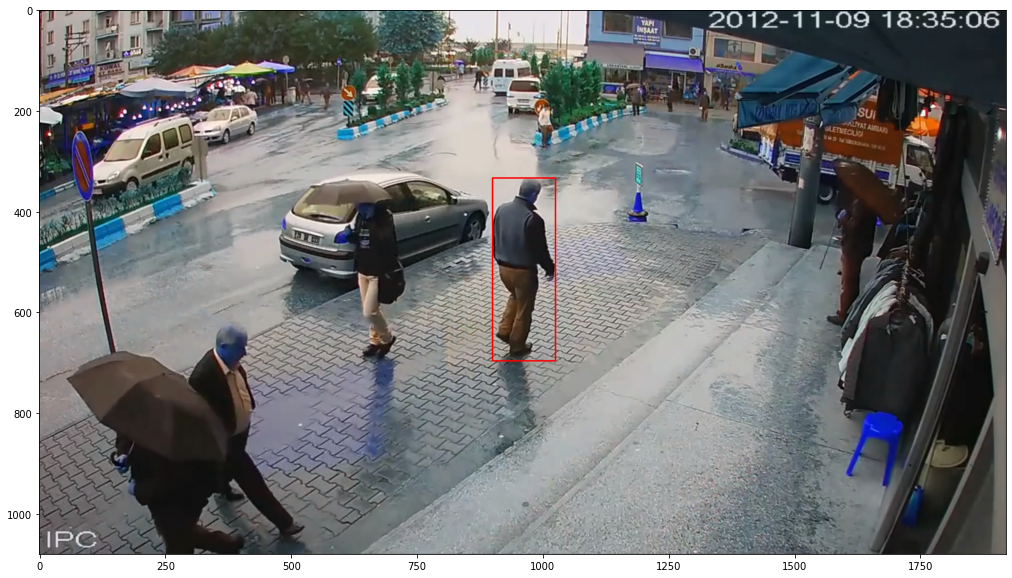

In [ ]:
from matplotlib import pyplot as plt
img = cv2.imread(f'frames/{random_number}.png')
_ = cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)

plt.figure(figsize=(20,10))
plt.imshow(img)

In [ ]:
#define a function which return the bottom center of every bbox
def mid_point(img,person,idx):
  #get the coordinates
  x1,y1,x2,y2 = person[idx]
  _ = cv2.rectangle(img, (x1, y1), (x2, y2), (0,0,255), 2)
  
  #compute bottom center of bbox
  x_mid = int((x1+x2)/2)
  y_mid = int(y2)
  mid   = (x_mid,y_mid)
  
  _ = cv2.circle(img, mid, 5, (0, 0, 255), -1)
  cv2.putText(img, str(idx), mid, cv2.FONT_HERSHEY_SIMPLEX,1, (255, 255, 255), 2, cv2.LINE_AA)
  
  return mid

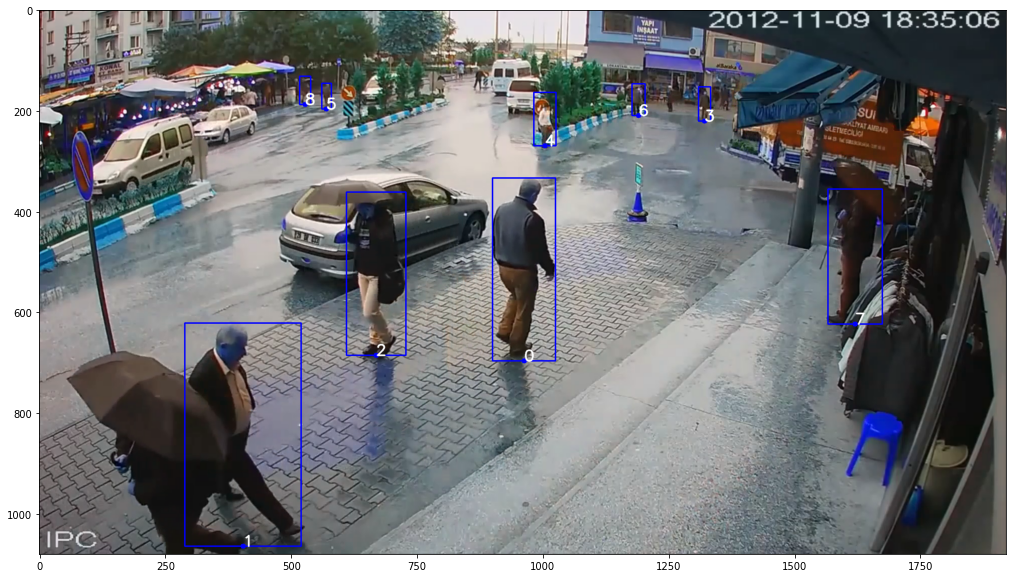

In [ ]:
#call the function
midpoints = [mid_point(img,person,i) for i in range(len(person))]

#visualize image
plt.figure(figsize=(20,10))
plt.imshow(img)

In [ ]:
#maths
from scipy.spatial import distance
def compute_distance(midpoints,num):
  dist = np.zeros((num,num))
  for i in range(num):
    for j in range(i+1,num):
      if i!=j:
        dst = distance.euclidean(midpoints[i], midpoints[j])
        dist[i][j]=dst
  return dist

In [ ]:
dist= compute_distance(midpoints,num)

In [ ]:
%%time
def find_closest(dist,num,thresh):
  p1=[]
  p2=[]
  d=[]
  for i in range(num):
    for j in range(i,num):
      if( (i!=j) & (dist[i][j]<=thresh)):
        p1.append(i)
        p2.append(j)
        d.append(dist[i][j])
  return p1,p2,d

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs


In [ ]:
import pandas as pd

thresh=200
p1,p2,d=find_closest(dist,num,thresh)
df = pd.DataFrame({"p1":p1,"p2":p2,"dist":d})
df

p1  p2        dist
0   3   6  131.461021
1   4   6  195.437970
2   5   8   42.953463

In [ ]:
def change_2_red(img,person,p1,p2):
  risky = np.unique(p1+p2)
  for i in risky:
    x1,y1,x2,y2 = person[i]
    _ = cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)  
  return img

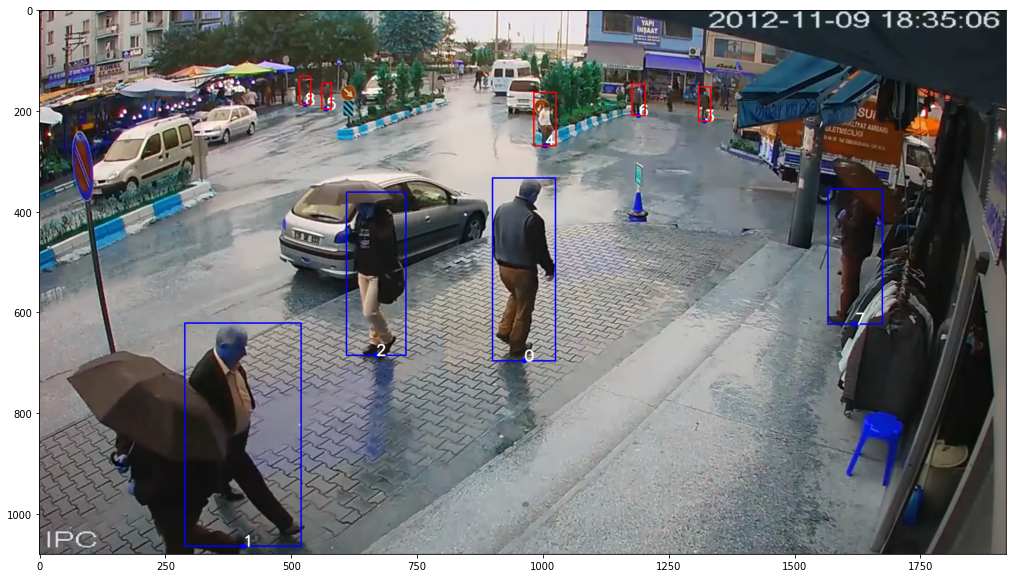

In [ ]:
img = change_2_red(img,person,p1,p2)

plt.figure(figsize=(20,10))
plt.imshow(img)

In [ ]:
import os
import re

names=os.listdir('frames/')
names.sort(key=lambda f: int(re.sub('\D', '', f)))

In [ ]:
def find_closest_people(name,thresh):

  img = cv2.imread('frames/'+name)
  outputs = predictor(img)
  classes=outputs['instances'].pred_classes.cpu().numpy()
  bbox=outputs['instances'].pred_boxes.tensor.cpu().numpy()
  ind = np.where(classes==0)[0]
  person=bbox[ind]
  midpoints = [mid_point(img,person,i) for i in range(len(person))]
  num = len(midpoints)
  dist= compute_distance(midpoints,num)
  p1,p2,d=find_closest(dist,num,thresh)
  img = change_2_red(img,person,p1,p2)
  cv2.imwrite('frames/'+name,img)
  return 0

In [ ]:
from tqdm import tqdm
thresh=200
_ = [find_closest_people(names[i],thresh) for i in tqdm(range(len(names))) ]

100%|██████████| 750/750 [15:18<00:00,  1.22s/it]


In [ ]:
%%time
frames = os.listdir('frames/')
frames.sort(key=lambda f: int(re.sub('\D', '', f)))

frame_array=[]

for i in range(len(frames)):
    
    #reading each files
    img = cv2.imread('frames/'+frames[i])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

    height, width, layers = img.shape
    size = (width,height)
    
    #inserting the frames into an image array
    frame_array.append(img)

out = cv2.VideoWriter('/content/gdrive/My Drive/Mini Project/video/final 1_output.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 25, size)
 
for i in range(len(frame_array)):
    # writing to a image array
    out.write(frame_array[i])
out.release()

CPU times: user 53 s, sys: 3.37 s, total: 56.4 s
Wall time: 56.9 s
